### QUESTION 1

(a)



   The required machine learning task described is supervised learning. In supervised learning, we have a labeled dataset where we know the input features (predictors) and their corresponding output or target variable (medical cost in this case). The goal is to train a model using this labeled data to predict the target variable for new, unseen instances.

 In this case, the dataset provided contains the predictors (age, sex, BMI, children, smoker, and region) as well as the target variable (medical cost). The objective is to build a prediction model that estimates the medical cost based on these predictors. Since we have the target variable available for training the model, it falls under the supervised learning category.

In this case, the best Supervised Machine Learning task to perform would be regression analysis. Regression analysis is used when the target variable is a continuous value, and the goal is to predict or estimate a numerical outcome. In this scenario, the target variable is the individual medical costs, which is a continuous variable.

Classification is used when the target variable is categorical, and the goal is to classify instances into different classes or categories. Clustering is used to group similar instances together based on their similarities and dissimilarities. However, in this case, we are interested in predicting the medical cost value for each individual, which makes it a regression problem.

Therefore, regression analysis is the most suitable ML task for this scenario as it will allow us to build a model that can estimate the medical cost of individuals based on the given predictors.

since the data is already described in the question, then we proceed to the Exploratory data analysis

### EXPLORATORY DATA ANALYSIS (EDA)

Exploratory Data Analysis (EDA) is a critical step in data analysis that offers several advantages for your analysis of predicting medical costs based on the given predictors. EDA helps us to understand the distribution of variables in our dataset. By examining the distributions of predictors and the target variable (medical cost), we can gain insights into their central tendencies, spreads, and any skewness or asymmetry present. This understanding can guide your choice of appropriate modeling techniques and transformations, if necessary.

Explore Relationships and Correlations: EDA enables the study of relationships between predictors and the target variable. By calculating correlations or using visualizations such as scatter plots or correlation matrices, we can identify which predictors have the strongest associations with medical costs. This knowledge helps in selecting the most relevant predictors for our prediction models.

Detect Patterns and Anomalies: EDA allows detecting of patterns, trends, and anomalies in the data. By visualizing the data through plots, charts, or statistical summaries, we  can uncover insights about the relationships between variables. For example, we may discover that certain age groups or regions have higher medical costs, or that specific combinations of predictors have a significant impact on medical expenses.


LOADING THE DATA

In [1]:

# Libraries 
import pandas as pd # FOR DATA MANIPULATION
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns


# LOADING THE DATA INTO A DATAFRAME
insurance = pd.read_excel('insurance.csv')

#Display the DataFrame
print(insurance.head())


   age     sex     bmi  children smoker     region  medicalCost
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


The provided data contains information on healthcare-related variables for a set of individuals. Each row represents a specific person, and the columns represent different attributes.

The "age" column indicates the age of each individual, providing insight into the age distribution of the sample. This variable can potentially be a significant predictor of healthcare costs since medical needs often vary across different age groups.

The "sex" column represents the gender of each person, distinguishing between males and females. Gender can be a relevant factor in healthcare analysis, as certain medical conditions or treatments may affect men and women differently.

The "bmi" column refers to the Body Mass Index, a measure of body fat based on height and weight. This variable provides information about the individuals' body composition and can offer insights into the potential correlation between body weight and medical costs.

The "children" column indicates the number of children each person has. This variable can be relevant since healthcare expenses may differ based on family size and the presence of dependents.

The "smoker" column denotes whether an individual is a smoker or not. Smoking habits can significantly impact healthcare costs due to the increased risk of smoking-related illnesses and associated medical treatments.

The "region" column represents the geographical region where each person resides. This variable can provide information on regional differences in healthcare costs, healthcare system variations, and potential regional-specific factors that may influence medical expenses.

Finally, the "medicalCost" column represents the target variable, indicating the healthcare costs incurred by each individual. This is the variable we aim to predict using the available features in the dataset.

In [2]:

# Check the types and number of rows and columns in the dataset
print(insurance.dtypes)
print("Number of rows:", insurance.shape[0])
print("Number of columns:", insurance.shape[1])


age              int64
sex             object
bmi            float64
children         int64
smoker          object
region          object
medicalCost    float64
dtype: object
Number of rows: 1338
Number of columns: 7


The dataset contains 1,338 rows and 7 columns. The data types of the columns shown above

In [3]:
# Compute descriptive statistics for numeric features in the datafame
numericals = insurance.select_dtypes(include=['int64', 'float64']).columns
numerical_stats = insurance[numericals].describe()
print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)


Descriptive Statistics for Numerical Columns:
               age          bmi     children   medicalCost
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


From these statistics, we can observe that the average age of the individuals in the dataset is around 39 years, with a standard deviation of 14.05. The average BMI (Body Mass Index) is approximately 30.66, with a standard deviation of 6.10. The majority of individuals have either 0 or 1 child, as indicated by the 25th and 50th percentiles. The medical costs vary significantly, with the minimum value being 1121.87 and the maximum value reaching 63770.43.

In [13]:
# Checking for missing values
print(insurance.isnull().sum())


age            0
sex            0
bmi            0
children       0
smoker         0
region         0
medicalCost    0
dtype: int64


From the above null value check for the data, There are no missing values in any column in the dataset.

Visualization plays a crucial role in data analysis and can greatly enhance our understanding of the dataset. In the given task, visualization techniques were employed below to gain insights into the distribution of key variables and provide a visual representation of the data.

The code snippet utilizes matplotlib's histogram plot to create a grid of subplots, each showcasing the distribution of a specific variable. Histograms are a popular choice for visualizing the distribution of continuous variables as they display the frequency or count of observations within different value ranges. By dividing the data into bins and representing the count on the y-axis, we can observe the shape, central tendency, and spread of each variable.

The histograms allow us to examine important characteristics of the data, such as the range and concentration of values. They help us identify potential outliers, assess the skewness of the distributions, and uncover any underlying patterns or clusters. Additionally, comparing the histograms of different variables can provide insights into their relationships and potential correlations.

In the given code, the histograms are organized into a grid of subplots, making it easier to compare and contrast the distributions of the variables. The subplots are annotated with appropriate titles and labels to provide context and enhance interpretability.

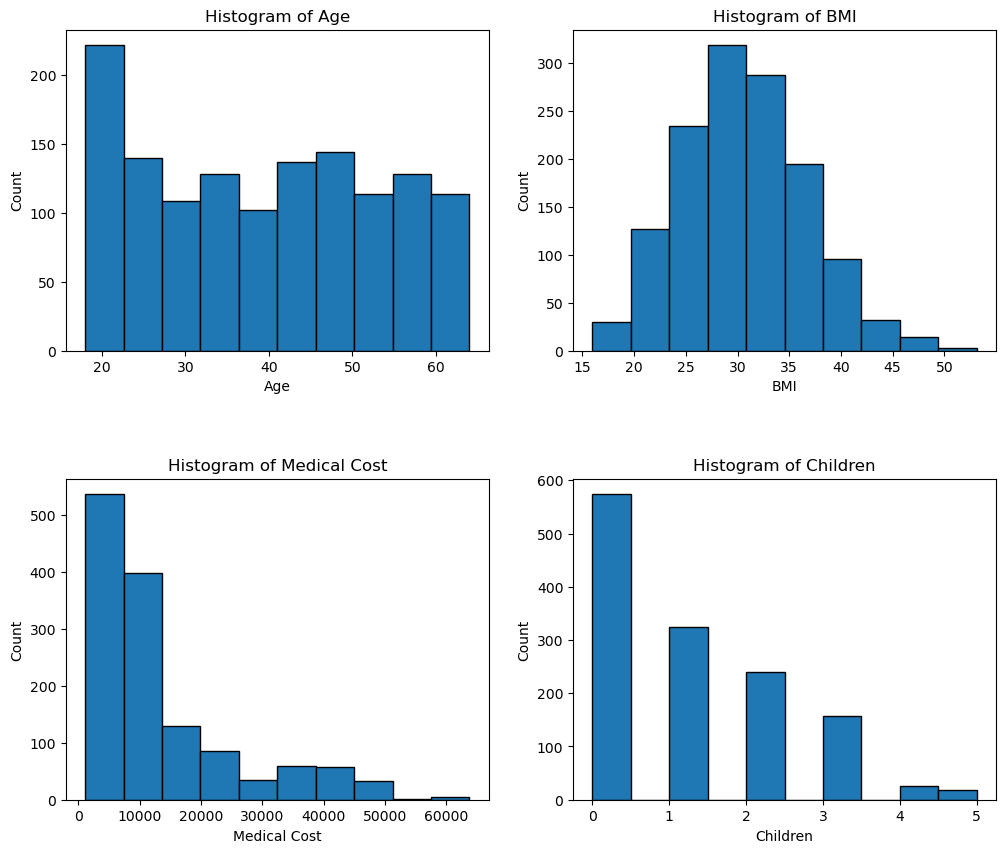

In [6]:
# HISTOGRAM DISTRIBUTION OF THE NUMERICAL COLUMNS

# Creating the grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4)

# Plotting the histograms in the subplots
#  age
axes[0, 0].hist(insurance['age'], bins=10, edgecolor='black')
axes[0, 0].set_title('Histogram of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# bmi
axes[0, 1].hist(insurance['bmi'], bins=10, edgecolor='black')
axes[0, 1].set_title('Histogram of BMI')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Count')

# medical cost
axes[1, 0].hist(insurance['medicalCost'], bins=10, edgecolor='black')
axes[1, 0].set_title('Histogram of Medical Cost')
axes[1, 0].set_xlabel('Medical Cost')
axes[1, 0].set_ylabel('Count')

# children
axes[1, 1].hist(insurance['children'], bins=10, edgecolor='black')
axes[1, 1].set_title('Histogram of Children')
axes[1, 1].set_xlabel('Children')
axes[1, 1].set_ylabel('Count')


# Showing the plots
plt.show()


The histograms reveal that the most dominant age group in record are those that are 20years with the rest being of nearly equal distributions. The BMI is normally distributed around the center value of 30, while the tarfet variable medical cost is more biased towards the left revaling that most of the individual do not tend to have a large pricing of medical cost in the data. Lastly it is revealed that the individuals with list amount of children dominate the data population.

Correlation Analaysis


#### Pearson correlation
Correlation analysis is a statistical technique used to measure and quantify the relationship between two or more variables. It helps us understand how changes in one variable are associated with changes in another variable. The correlation coefficient, typically denoted by "r", represents the strength and direction of the relationship between variables.

In the context of the given case, correlation analysis can be applied to examine the relationships between the different features in the insurance dataset and the target variable, 'medicalCost'. By calculating the correlation coefficients between 'medicalCost' and each feature, we can assess the degree of linear association between them. This analysis helps us identify which features have a stronger or weaker relationship with medical costs.

For example, if the correlation coefficient between 'medicalCost' and 'age' is positive and close to 1, it indicates that as age increases, medical costs tend to increase as well. On the other hand, if the correlation coefficient between 'medicalCost' and 'bmi' is close to 0, it suggests a weak or no linear relationship between these two variables.

In [20]:
# Correlation Analysis
correlation_matrix = insurance.corr()
# outputing the correlation matrix 
print(correlation_matrix)

                  age       bmi  children  medicalCost
age          1.000000  0.109272  0.042469     0.299008
bmi          0.109272  1.000000  0.012759     0.198341
children     0.042469  0.012759  1.000000     0.067998
medicalCost  0.299008  0.198341  0.067998     1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_29896\2576518602.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = insurance.corr()


The correlation analysis results show the correlation coefficients between the numeric features (age, bmi, children) and the target variable, medicalCost. These coefficients indicate the strength and direction of the linear relationships between the variables.

The correlation coefficient between age and medicalCost is 0.299, indicating a positive but moderate relationship. This suggests that as age increases, there tends to be a moderate increase in medical costs. However, the correlation is not very strong, implying that age alone may not be a dominant predictor of medical costs.

The correlation coefficient between bmi and medicalCost is 0.198, indicating a positive but relatively weak relationship. This suggests that there is a weak tendency for higher BMI values to be associated with higher medical costs. However, like age, BMI alone may not have a substantial impact on medical costs.

The correlation coefficient between children and medicalCost is 0.068, which indicates a very weak positive relationship. This suggests that there is only a slight tendency for higher numbers of children to be associated with higher medical costs. It implies that the number of children is not a significant predictor of medical costs in this dataset.

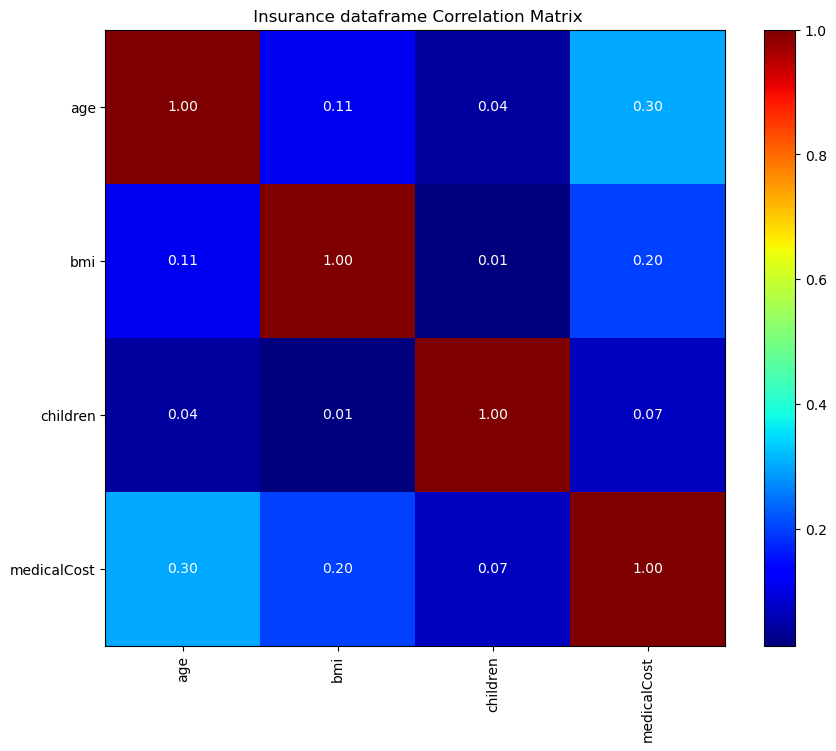

In [60]:
# Plotting the correlation matrix as a heatmap

# adjusting the height of the plot
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='jet', aspect='auto')

# Adding the correlation values as text
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]), ha='center', va='center', color='white')

plt.title(' Insurance dataframe Correlation Matrix')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


To determine which categorical variable is more related to the target variable ('medicalCost' in this case), we can focus on the chi-square test results. The chi-square test measures the independence between two categorical variables. A lower p-value indicates a stronger association between the variables.The p-values indicate the level of significance for the chi-square test, providing insight into the relationship between each categorical variable and the target variable 'medicalCost'.


#### Chi-Squared Test

The chi-square test is a statistical test used to determine if there is a significant association between two categorical variables. It assesses whether the observed distribution of data differs significantly from the expected distribution, assuming that there is no association between the variables.

In the case of the medical insurance dataset, we can apply the chi-square test to examine the relationship between the target variable (medicalCost) and the remaining categorical columns (sex, smoker, region). The chi-square test can help us determine if these categorical variables have a significant impact on medical costs.

To perform the chi-square test, we would first create a contingency table, which displays the observed frequencies of the target variable and the categorical variables. The contingency table allows us to compare the observed frequencies with the expected frequencies under the assumption of independence.

Once the contingency table is created, the chi-square test calculates the chi-square statistic and associated p-value. The chi-square statistic measures the difference between the observed and expected frequencies, and the p-value represents the probability of obtaining such a difference by chance alone.

If the p-value is below a predetermined significance level (e.g., 0.05), we reject the null hypothesis of independence and conclude that there is a significant association between the variables. This indicates that the categorical variable has a significant impact on the medical costs.

In [24]:
# Performing a chi-squared test for the non numeric columns and the target

#used library
from scipy.stats import chi2_contingency


# List of categorical columns
categorical_columns = ['sex', 'smoker', 'region']

# Dictionary to store the p-values
p_values = {}

# Perform cross-tabulation and chi-square test for each categorical variable
for column in categorical_columns:
    # Cross-tabulation
    cross_tab = pd.crosstab(index=insurance[column], columns=insurance['medicalCost'])
    
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    
    # Store the p-value
    p_values[column] = p

# Print the p-values for each categorical variable
print("Chi-square test p-values for each categorical variable:")
for column, p_value in p_values.items():
    print(f"{column}: {p_value}")


Chi-square test p-values for each categorical variable:
sex: 0.47943654572546
smoker: 0.47943654572545824
region: 0.4703353426605913


The chi-square test conducted on the dataset, the p-values for each categorical variable were examined to assess the relationship between these variables and the medical costs. The results indicate that there is no significant association between the categorical variables and the medical costs.

For the 'sex' variable, with a p-value of 0.4794, there is no strong evidence to suggest that gender has a significant impact on medical costs. This implies that whether an individual is male or female does not play a significant role in determining their medical expenses.

Similarly, the 'smoker' variable, with a p-value of 0.4794, does not show a significant relationship with medical costs. This suggests that being a smoker or a non-smoker alone may not be a strong determinant of the medical expenses incurred by individuals in the dataset.

Based on the correlation annalysis the three predictor variables that are best predictors for the target variable (medicalCost) are the Region , age and Bmi.





### MODEL BUILDING

 in the context of this task, refers to the process of creating a statistical model that can predict the medical costs based on the given dataset. The goal is to develop a model that can capture the relationship between the independent variables (predictors) and the dependent variable (medical cost) in order to make accurate predictions.

In this case, a simple linear regression model will be implemented. Linear regression is a statistical technique that aims to establish a linear relationship between the independent variables and the dependent variable. The model assumes that the relationship can be represented by a straight line, where the dependent variable is a linear combination of the independent variables.

The simple linear regression model uses a single predictor variable to predict the medical costs. Each predictor variable, such as age, BMI, or region, is individually considered as a predictor in separate models. The model estimates the coefficients (slope and intercept) that best fit the data and minimize the error between the predicted and actual values of the dependent variable.

Building a simple linear regression model based on each of the predictors selected.
Preparing the data

In [25]:
# Extract the predictor variables
X_region = insurance[['region']] 
X_age = insurance[['age']]
X_bmi = insurance[['bmi']]

# Extracting the target variables
y = insurance['medicalCost']


#### Encoding the categorical variable
One-hot encoding is a technique used to convert categorical variables into binary vectors. It creates new binary columns for each category within a categorical variable, representing the presence or absence of that category. This encoding is suitable when there is no inherent ordinal relationship between the categories, and each category is considered independent.
Since 'Region' is a categorical variable, we encode it using one-hot encoding technique.

In [26]:
# Performing the one-hot encoding for the 'region' variable
X_region_encoded = pd.get_dummies(X_region, drop_first=True)
X_region_encoded

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1



#### Splitting the Data
Splitting the data into training and testing sets: Split the dataset into a training set and a testing set to evaluate the performance of the regression model. 80% of the data is used to train the models while the remaining 20% are used to test the model, the selection of the test and train record are done at random.

In [28]:
# library used
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets for each predictor
X_region_train, X_region_test, y_train, y_test = train_test_split(X_region_encoded, y, test_size=0.2, random_state=42)
X_age_train, X_age_test, y_train, y_test = train_test_split(X_age, y, test_size=0.2, random_state=42)
X_bmi_train, X_bmi_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)


#### Building and Fitting The models

Building and training the linear regression models: Use the LinearRegression class from scikit-learn to build and train the models for each predictor.

In [33]:
#library used
from sklearn.linear_model import LinearRegression

# Creating a Linear Regression model for each predictor
regression_model_region = LinearRegression()
regression_model_age = LinearRegression()
regression_model_bmi = LinearRegression()

# Fitting/Training the models to the training data
regression_model_region.fit(X_region_train, y_train)
regression_model_age.fit(X_age_train, y_train)
regression_model_bmi.fit(X_bmi_train, y_train)


LinearRegression()

Evaluating the models: Predicting the medical cost using the testing data for each predictor and calculate evaluation metrics.

In [35]:
# Predict the medical cost using the testing data for each predictor
y_pred_region = regression_model_region.predict(X_region_test)
y_pred_age = regression_model_age.predict(X_age_test)
y_pred_bmi = regression_model_bmi.predict(X_bmi_test)

# Calculate evaluation metrics (Mean Squared Error and R-squared) for each predictor
from sklearn.metrics import mean_squared_error, r2_score

mse_region = mean_squared_error(y_test, y_pred_region)
mse_age = mean_squared_error(y_test, y_pred_age)
mse_bmi = mean_squared_error(y_test, y_pred_bmi)

r2_region = r2_score(y_test, y_pred_region)
r2_age = r2_score(y_test, y_pred_age)
r2_bmi = r2_score(y_test, y_pred_bmi)

print("Linear Regression Model based on Region:")
print("Mean Squared Error:", mse_region)
print("R-squared:", r2_region)

print("\nLinear Regression Model based on Age:")
print("Mean Squared Error:", mse_age)
print("R-squared:", r2_age)

print("\nLinear Regression Model based on BMI:")
print("Mean Squared Error:", mse_bmi)
print("R-squared:", r2_bmi)


Linear Regression Model based on Region:
Mean Squared Error: 153615981.67967588
R-squared: 0.01051699293391084

Linear Regression Model based on Age:
Mean Squared Error: 135983957.4805469
R-squared: 0.12408973539501944

Linear Regression Model based on BMI:
Mean Squared Error: 149085057.03839505
R-squared: 0.03970193117941878


#### Visualizing the Models

To visualize the performance of our regression models, we create scatter plots to compare the predicted values with the actual values. This will give you a visual representation of how well the models are fitting the data.
These scatter plots will display the relationship between the actual medical costs and the predicted medical costs for each model. The red dashed line represents the ideal scenario where the predicted values perfectly match the actual values. The closer the points are to this line, the better the model's predictions.

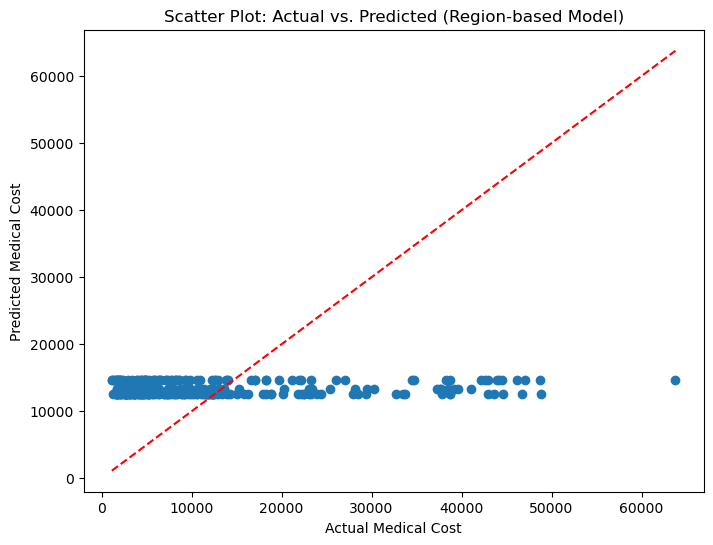

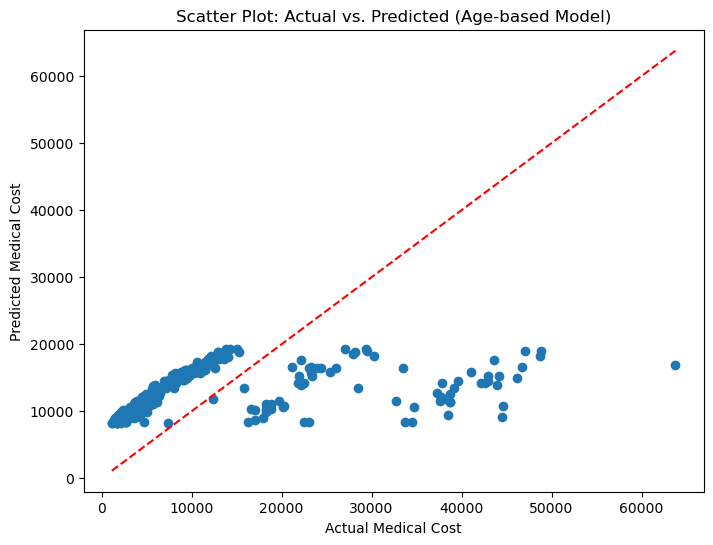

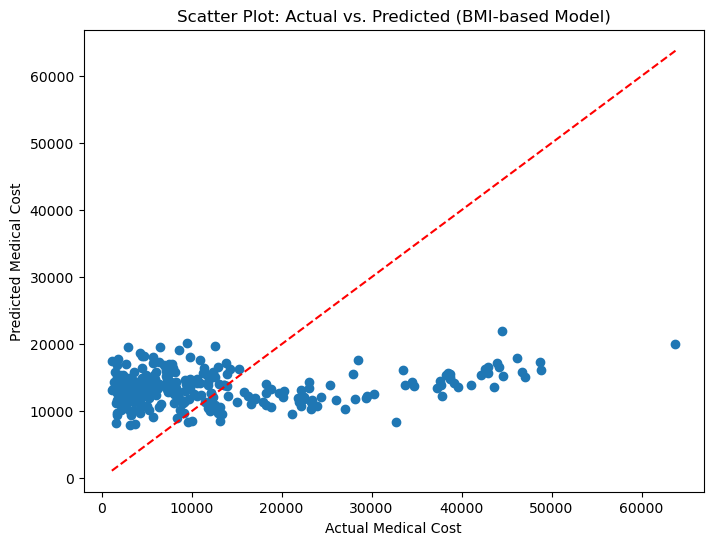

In [36]:
# Scatter plot for Region-based model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_region)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Scatter Plot: Actual vs. Predicted (Region-based Model)')
plt.xlabel('Actual Medical Cost')
plt.ylabel('Predicted Medical Cost')
plt.show()

# Scatter plot for Age-based model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_age)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Scatter Plot: Actual vs. Predicted (Age-based Model)')
plt.xlabel('Actual Medical Cost')
plt.ylabel('Predicted Medical Cost')
plt.show()

# Scatter plot for BMI-based model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_bmi)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Scatter Plot: Actual vs. Predicted (BMI-based Model)')
plt.xlabel('Actual Medical Cost')
plt.ylabel('Predicted Medical Cost')
plt.show()


1. Linear Regression Model based on Region:

 Mean Squared Error: 153,615,981.68
 R-squared: 0.0105
The MSE value indicates the average squared difference between the predicted medical costs and the actual medical costs for the Region-based model. A higher MSE value suggests a larger prediction error, meaning the model's predictions deviate more from the actual values. The low R-squared value of 0.0105 indicates that only a small portion (1.05%) of the variation in the medical costs can be explained by the Region predictor.

2. Linear Regression Model based on Age:

Mean Squared Error: 135,983,957.48
R-squared: 0.1241
The MSE value for the Age-based model is slightly lower compared to the Region-based model, indicating a slightly better fit to the data. The R-squared value of 0.1241 suggests that around 12.41% of the variation in the medical costs can be explained by the Age predictor. This indicates that Age has a slightly stronger relationship with medical costs compared to Region.


3. Linear Regression Model based on BMI:

Mean Squared Error: 149,085,057.04
R-squared: 0.0397
The MSE value for the BMI-based model is similar to the Region-based model, indicating a similar level of prediction error. The R-squared value of 0.0397 suggests that approximately 3.97% of the variation in the medical costs can be explained by the BMI predictor. This indicates that BMI has a weak relationship with medical costs compared to Age.

### Building two multivariate regression models (1) with the three predictors above and (2) with all
### the predictors in the dataset. Evaluate and compare the two models.

 Model 1: Selected predictors

Initially the categorical variables are encoded using Label encoding technique. Then we will select the three predictors 'Region', 'Age', and 'BMI' from the insurance dataset and store them in a new DataFrame called X1.
Next, we will extract the target variable 'medicalCost' and store it in a new Series called y1.
To evaluate the model, we will split the data into training and testing sets using train_test_split from scikit-learn. We will pass X1 and y1 to train_test_split, along with the desired test size (e.g., 0.2) and a random state value for reproducibility.
Once the data is split, we will create an instance of the LinearRegression model and assign it to a variable called model1.
Finally, we will fit model1 to the training data using the fit method, passing in the training features (X1_train) and the corresponding target values (y1_train).
   
   
  Model 2: All predictors
  
  
For Model 2, we will include all predictors in the dataset except for the target variable 'medicalCost'. We will assign the remaining predictors to a new DataFrame called X2.
    Similarly, we will extract the target variable 'medicalCost' and store it in y2.
    To evaluate the model, we will again split the data into training and testing sets using train_test_split. This time, we will use X2 and y2 as inputs to the function.
    We will create another instance of the LinearRegression model called model2.
    Finally, we will fit model2 to the training data using the fit method, passing in X2_train and y2_train.
    Once the models are trained, we can evaluate their performance by predicting the target values for the test sets and calculating the mean squared error (MSE) and R-squared values.

In [34]:
# Encoding the categorical features

from sklearn.preprocessing import LabelEncoder

# Creating a copy of the original dataframe
insurance_encoded = insurance.copy()

# Label encoding categorical variables
le = LabelEncoder()
insurance_encoded['sex'] = le.fit_transform(insurance_encoded['sex'])
insurance_encoded['smoker'] = le.fit_transform(insurance_encoded['smoker'])
insurance_encoded['region'] = le.fit_transform(insurance_encoded['region'])




# Model 1:

# Three predictors (Region, Age, BMI)
# splitting the data into predictors anf target
X1 = insurance_encoded[['region', 'age', 'bmi']]  # predictors
y1 = insurance_encoded['medicalCost']  # target

# Splitting the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Creating and fitting the regression model
model1 = LinearRegression()
model1.fit(X1_train, y1_train)



# Model 2:

#All predictors in the given data
X2 =insurance_encoded.drop('medicalCost', axis=1) # predictors
y2 =insurance_encoded['medicalCost']  # target variable

# Splitting the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


# initializing and fitting the regression model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)



# Evaluating the models

# using the model to predict the target
y1_pred = model1.predict(X1_test)
# calculating the evaluation parameters 
mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)


# using the model to predict the target
y2_pred = model2.predict(X2_test)
# calculating the evaluation parameters 
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

# Comparing the models
print("Model 1 (Region, Age, BMI)")
print("Mean Squared Error:", mse1)
print("R-squared:", r2_1)
print("\nModel 2 (All Predictors)")
print("Mean Squared Error:", mse2)
print("R-squared:", r2_2)


Model 1 (Region, Age, BMI)
Mean Squared Error: 131219226.51057266
R-squared: 0.1547806848423372

Model 2 (All Predictors)
Mean Squared Error: 33635210.431178406
R-squared: 0.7833463107364539


Based on the evaluation results, here's what the metrics imply about the two models:

1. Model 1 (Region, Age, BMI):

    Mean Squared Error (MSE): The MSE for this model is 131,219,226.51. It represents the average squared difference between the actual medical costs and the predicted values by the model. Lower MSE indicates better model performance, so a lower value would be desirable. However, the MSE of this model is relatively high.
    R-squared: The R-squared value for this model is 0.1548. R-squared measures the proportion of the variance in the target variable (medical costs) that can be explained by the predictors. A higher R-squared value indicates a better fit of the model to the data. However, the R-squared value of 0.1548 suggests that only around 15% of the variance in medical costs is explained by the predictors in this model. This indicates a relatively weak relationship between the predictors (Region, Age, BMI) and the target variable.


2. Model 2 (All Predictors):

    Mean Squared Error (MSE): The MSE for this model is 33,635,210.43. It is significantly lower than the MSE of Model 1, indicating better performance in terms of predicting medical costs.
    R-squared: The R-squared value for this model is 0.7833. It is substantially higher than the R-squared value of Model 1, indicating a much better fit of the model to the data. The predictors in this model (including all available features) explain approximately 78% of the variance in the medical costs.


#### Comparing the two models:

   Based on these results, it is evident that Model 2, which includes all predictors, performs significantly better than Model 1, which only considers Region, Age, and BMI. Including additional predictors in the model leads to a substantial reduction in the mean squared error and a substantial increase in the amount of variance explained by the model. This highlights the importance of considering all available predictors in order to build a more accurate regression model for predicting the medical cost.

## CONCLUSION

  In this task, we performed an analysis on an insurance dataset to predict medical costs. We began by loading the data and performing data exploration, including checking for missing values and visualizing the distributions of different variables.Next, we conducted statistical analysis and explored relationships between categorical variables using cross-tabulation and chi-square tests. This helped us understand the associations between different categorical variables and the target variable, medical cost.

  We then proceeded to build regression models to predict medical costs based on individual predictors. We utilized simple linear regression models for each predictor, evaluating their performance using mean squared error and R-squared values. This allowed us to assess the predictive power of each individual predictor.Subsequently, we expanded our analysis by building two multivariate regression models. The first model included three predictors (Region, Age, BMI), while the second model incorporated all available predictors. We evaluated and compared the performance of these models using mean squared error and R-squared values. This comparison enabled us to determine the impact of including additional predictors on the predictive accuracy of the models.Moreover, the limited dataset provided may impact the generalizability of the models. The absence of critical variables, such as pre-existing conditions or specific treatments received, restricts the models' ability to capture the full range of factors influencing medical costs. Consequently, the models may not perform well when applied to new, unseen data or different populations. It is essential to acknowledge these limitations and consider collecting additional data or exploring alternative modeling techniques to improve the accuracy and generalizability of the predictions.

  The results revealed that the model with all predictors performed significantly better than the model with only three predictors. The mean squared error was substantially lower, indicating a smaller prediction error, and the R-squared value was substantially higher, indicating a greater proportion of variance explained by the predictors. These findings underscore the importance of considering all available predictors when constructing regression models for predicting medical costs.


### QUESTION 2

Indtroduction

The task at hand involves using machine learning to predict whether an individual makes more than $50,000 a year based on a set of attributes. The dataset used for this task is the US Census dataset from the Census Bureau, publicly available from the UCI Machine Learning Repository. This dataset contains various features that provide information about an individual's demographic, educational, and employment background.

The objective is to build a machine learning model that can accurately classify individuals into two categories: those who make more than $50,000 annually and those who do not. By leveraging the power of machine learning algorithms, we aim to uncover patterns and relationships within the dataset that can help us predict an individual's income level.

To accomplish this task, we will follow a structured data science methodology. This involves steps such as data understanding, data preparation, feature selection/engineering, model selection, model training, model evaluation, and model optimization. Throughout this process, we will make informed assumptions and consider domain knowledge to ensure the reliability and relevance of our model.

By successfully building a robust machine learning model, we can provide valuable insights into the factors that contribute to an individual's income level. This information can be utilized in various applications, such as targeted marketing, resource allocation, and socioeconomic analysis.

Exploratory data Analysis(EDA)

Before diving into building a machine learning model, it is crucial to perform exploratory data analysis (EDA) on the US Census dataset. EDA helps us gain insights into the data, understand its structure, identify patterns, and detect any anomalies or missing values. This initial exploration sets the foundation for further data preprocessing and feature engineering.

During the EDA phase, we will examine each feature in the dataset and analyze its distribution, summary statistics, and potential relationships with the target variable. This process will help us understand the characteristics of the dataset and guide us in making informed decisions during the modeling phase.


DATA UNDERSTANDING

In [1]:
# LOADING THE CENSUS DATA INTO A DATAFRAME

# USED LIBRARIES
import pandas as pd 

# for ignore warnings
import warnings
warnings.filterwarnings('ignore');

# storing the data in a dataframe
task2_data = pd.read_excel('CensusDB.csv')

# taking a quick look at the data
task2_data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K


The loaded Census data consists of 32,561 rows and 14 columns. Each row represents an individual, while the columns represent different attributes related to employment, education, demographics, and income. The dataset provides a comprehensive view of various factors that can potentially influence an individual's income. By analyzing this dataset, we can explore patterns, relationships, and trends among the variables to build predictive models and gain insights into income disparities.

 Information on age, workclass, education level, marital status, occupation, relationship, sex, capital gains, capital losses, hours per week, native country, and income. It is notable that the dataset contains missing values denoted by "?" in the workclass and occupation columns. The income column serves as the target variable, indicating whether an individual earns more than \\$50,000 annually. Further exploration and analysis of the data will enable us to understand the distribution and relationships between these attributes 


The output displayed above shows a snapshot of the dataset, providing a glimpse into the structure and contents of the DataFrame. With the first few rows of the dataset shown, we can observe the values of different attributes such as age, workclass, education level, marital status, occupation, relationship, sex, capital gains, capital losses, hours per week, and native country. The "label" column indicates whether an individual earns more than $50,000 annually, serving as the target variable for predictive modeling. 

Checking the number of the records(rows) that have income above 50K and below 50K

In [5]:
import pandas as pd

# Loading the census data into a DataFrame
task2_data = pd.read_excel('CensusDB.csv')

# Counting the number of rows labeled ">50k" and "<=50k" in the income column
num_gt_50k = task2_data[task2_data['income'] == '>50K'].shape[0]
num_le_50k = task2_data[task2_data['income'] == '<=50K'].shape[0]

# Calculating the percentages
total_rows = task2_data.shape[0]
percent_gt_50k = (num_gt_50k / total_rows) * 100
percent_le_50k = (num_le_50k / total_rows) * 100

# Creating a summary table
summary_table = pd.DataFrame({
    'Income Level': ['>50k', '<=50k'],
    'Number of Rows': [num_gt_50k, num_le_50k],
    'Percentage': [percent_gt_50k, percent_le_50k]
})

#  Displaying the summary table
table = pd.DataFrame(summary_table)

table

,Income Level,Number of Rows,Percentage
0,>50k,7841,24.080956
1,<=50k,24720,75.919044


The resulting summary table provides a clear breakdown of the income levels in the dataset, showing the number of rows and the corresponding percentages for each income category. 
The income levels were divided into two categories: ">50k" and "<=50k". Out of all the records, there were 7,841 individuals with an income level above \\$50,000, while 24,720 individuals had an income level at or below $50,000. This indicates that the majority of individuals, approximately 75.92% of the dataset, fall into the category of earning \\$50,000 or less annually.

#### Handling Missing values

from the quick glimpse of the data, we can see that there are some missing values from the data labaled as '?'. 
now we attempt to count the number of missing values in each feature for the data

In [21]:

# Counting the number of "?" occurrences in each column
missing_values = task2_data.eq("?").sum()

# Displaying the count for each column
for column, count in missing_values.iteritems():
    print(f"'{column}': {count} occurrences of '?'")


'age': 0 occurrences of '?'
'workclass': 1836 occurrences of '?'
'fnlwgt': 0 occurrences of '?'
'education': 0 occurrences of '?'
'education-num': 0 occurrences of '?'
'marital-status': 0 occurrences of '?'
'occupation': 1843 occurrences of '?'
'relationship': 0 occurrences of '?'
'sex': 0 occurrences of '?'
'capital-gain': 0 occurrences of '?'
'capital-loss': 0 occurrences of '?'
'hours-per-week': 0 occurrences of '?'
'native-country': 583 occurrences of '?'
'income': 0 occurrences of '?'


 Just three columns that contain missing values represented as "?". It is important to handle missing values appropriately when building machine learning models. In this case, we observe that the columns 'workclass', 'occupation', and 'native-country' have a significant number of missing values.

It is worth noting that simply removing rows with missing values or imputing them with arbitrary values may lead to the loss of valuable information or introduce bias in the analysis. In some cases, missing values can carry important meaning or be a reflection of the real-world data collection process.

In this particular scenario, considering the nature of the data and the potential impact of missing values, it may be justified to retain the rows with missing values represented as "?". By retaining these rows, we ensure that the model learns from the available information without discarding potentially valuable data points.

### Feature Exploration

Feature exploration is a crucial step in building a machine learning model to predict income levels based on the Census data. We conduct feature exploration to investigate and analyze the different features or attributes in the dataset, gaining insights and understanding their relationships with the target variable, which is the income level.

Through feature exploration, we identify the most relevant features that contribute to predicting income levels. This involves understanding the distribution of each feature, exploring patterns or trends, and examining potential relationships or correlations between features and the income label.

In the context of the Census data, we conduct feature exploration to examine the age distribution and its impact on income levels. We explore the different workclass categories to determine if specific employment statuses are associated with higher or lower incomes. Additionally, we analyze the education level and its numerical representation (education-num) to understand the relationship between education and income. We also explore features such as marital status, occupation, and hours per week to uncover any potential patterns or trends.

By conducting feature exploration, we gain valuable insights into the dataset, understand the significance of each feature, and identify any biases or imbalances. 

distribution of age vs income

Text(0, 0.5, 'Number of entries')

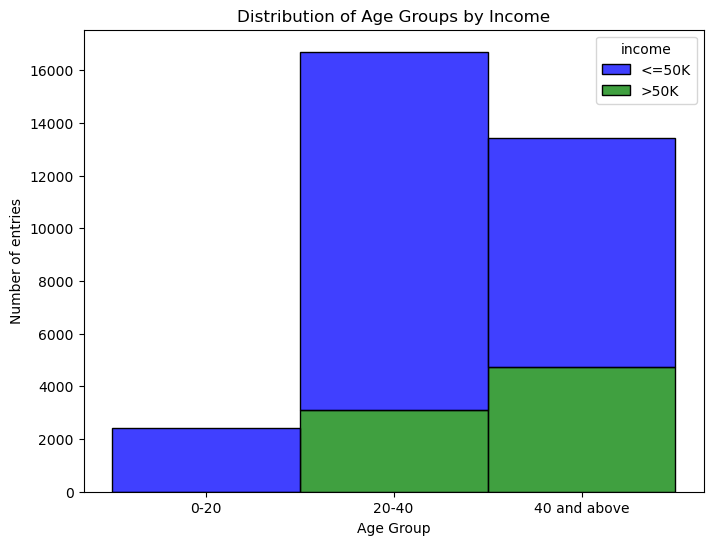

In [17]:
# uesd libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the age into intervals
age_groups = pd.cut(task2_data['age'], bins=[0, 20, 40, float('inf')], labels=['0-20', '20-40', '40 and above'])

# Creating a new column with the age groups
task2_data['age_group'] = age_groups

# Setting the color palette for income categories
palette = {'<=50K': 'blue', '>50K': 'green'}

# Plotting the distribution of age with colored income categories
plt.figure(figsize=(8, 6))
sns.histplot(data=task2_data, x='age_group', hue='income', palette=palette, multiple='stack')
plt.title('Distribution of Age Groups by Income')
plt.xlabel('Age Group')
plt.ylabel('Number of entries')



Individuals within the age range of 0 to 20 don't earn an income greater than \\$50,000 in the dataset, while the age range of 20 to 40 actually earns more income below \\$50,000 than they do for income greater than \\$50,000. Lastly, the same is also true for the age groups of 40 and above, but this group has the largest number of individuals that earn above \\$50,000.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


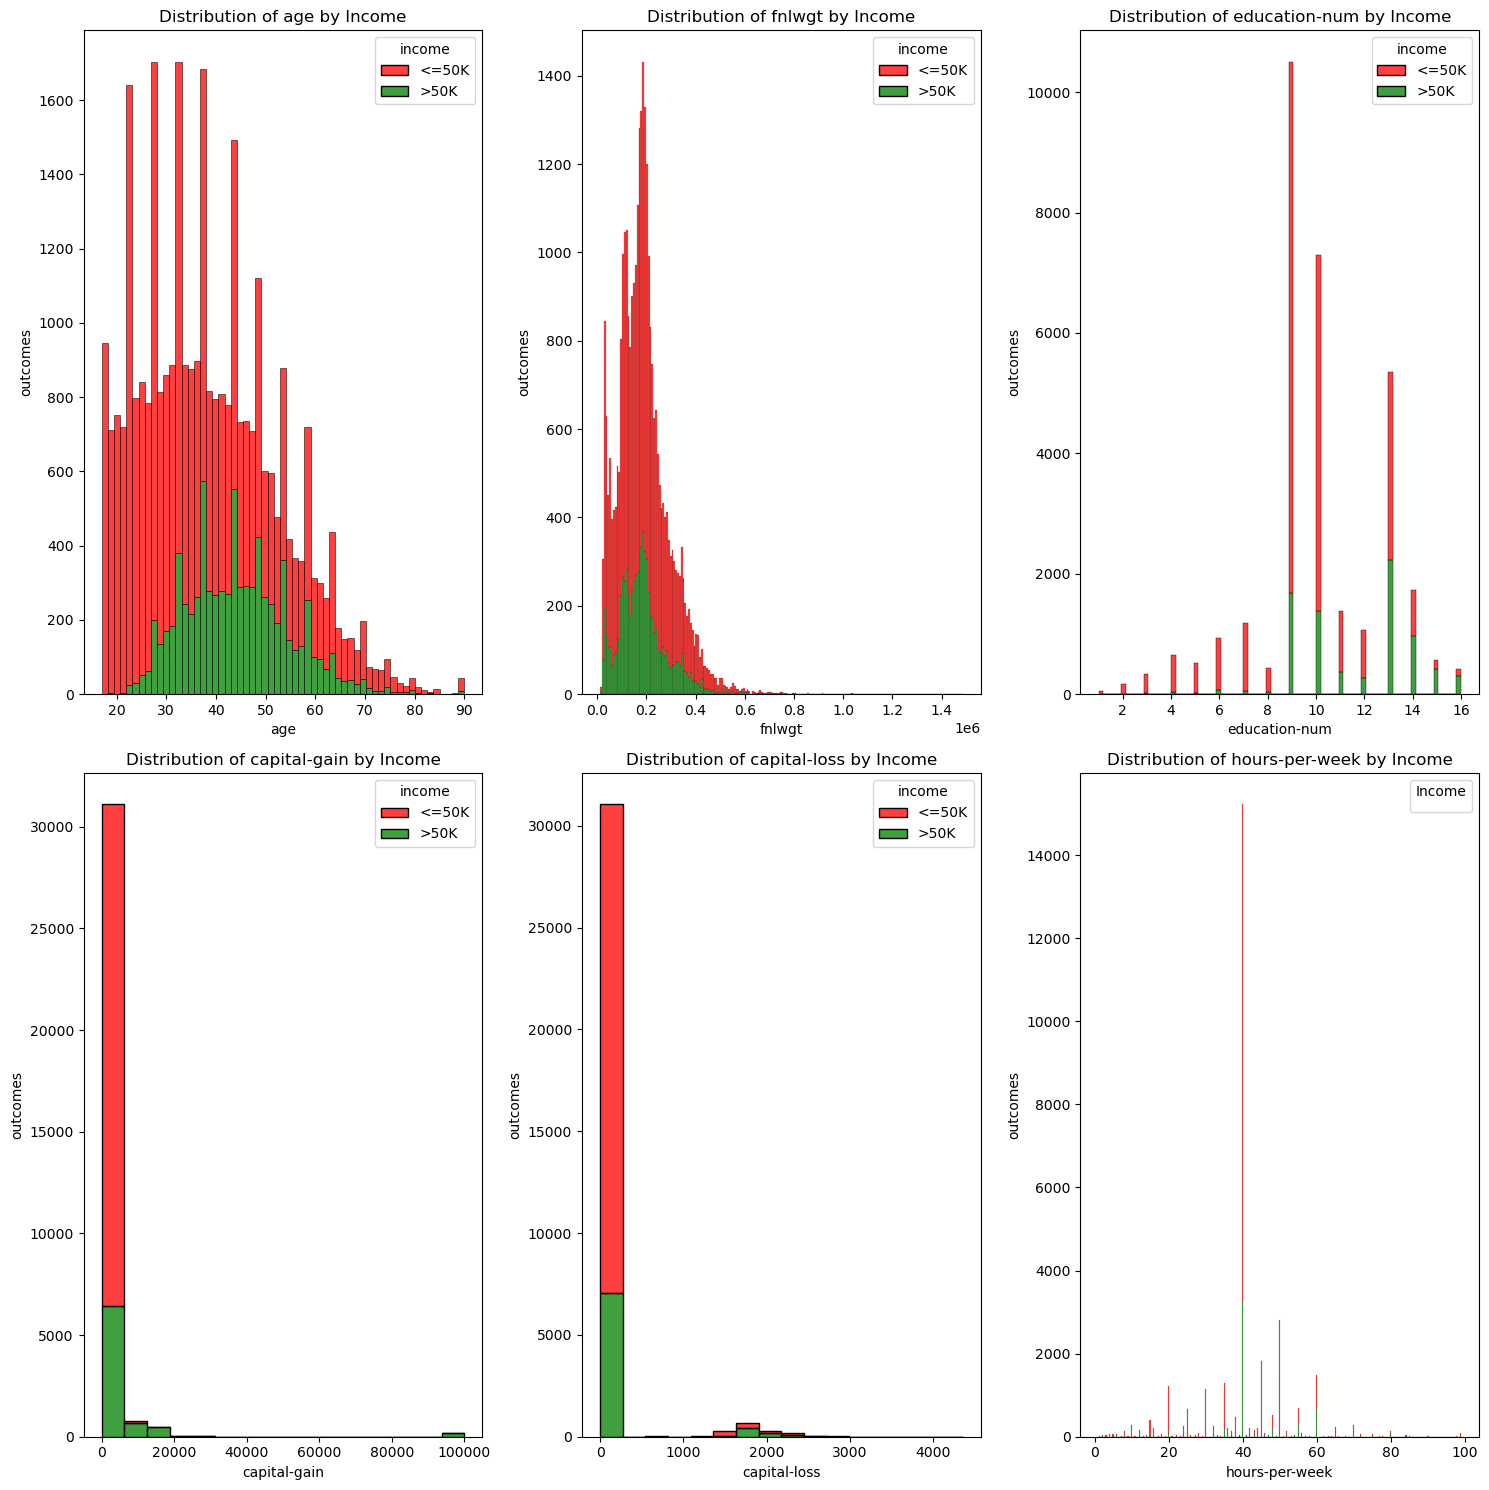

In [18]:
# used libraries
import matplotlib.pyplot as plt
import seaborn as sns
import math

# for ignore warnings
import warnings
warnings.filterwarnings('ignore');

#removing the age grouping feature created
task2_data = task2_data.drop('age_group', axis=1)

# Selecting only the numeric columns
numeric_columns = task2_data.select_dtypes(include=['int64', 'float64']).columns

# Setting the color palette for income categories
palette = {'<=50K': 'red', '>50K': 'green'}

# Calculating the number of rows and columns for the grid
num_cols = 3
num_rows = math.ceil(len(numeric_columns) / num_cols)

# Creating a figure and axes for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterating over each numeric column and plot in the corresponding grid cell
for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols

    # Plot the distribution of the current column with colored income categories
    sns.histplot(data=task2_data, x=column, hue='income', palette=palette, multiple='stack', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column} by Income')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('outcomes')
    plt.legend(title='Income', loc='upper right')

# Removing any unused subplots
if len(numeric_columns) < num_rows * num_cols:
    for i in range(len(numeric_columns), num_rows * num_cols):
        fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjusting the spacing between subplots
fig.tight_layout()

# Displayig the grid of plots
plt.show()


The analysis of the distribution for the final weight and age reveals that both distributions are skewed to the left, with a higher concentration of lower values. Interestingly, within these distributions, there is a higher number of individuals with income greater than \\$50,000. This suggests that individuals with lower final weights and younger ages have a higher likelihood of earning above \\$50,000 annually.

Furthermore, the distribution of the education number, which represents the level of education for individuals in the dataset, demonstrates a positive relationship with income. As the education level increases, there is a higher chance of an individual earning above \\$50,000. This finding indicates that education plays a significant role in determining income levels.

Regarding the distributions of capital gain and capital loss, it is evident that individuals with lower capital gains and losses have a higher likelihood of earning above \\$50,000. This suggests that individuals with minimal capital gains or losses tend to have higher incomes.

Lastly, the distribution of hours per week in relation to the income label indicates that individuals working between 40 to 60 hours per week have a greater chance of earning above \\$50,000 annually. This suggests that working a moderate number of hours per week is associated with higher income levels.

##### Non-Numerical features

In the part are focusing on visualizing the categorical columns in the Census data. Categorical columns contain information such as workclass, education, marital status, occupation, relationship, and sex. 
By visualizing the categorical columns, we can gain insights into how different categories are distributed across income levels. This information is crucial for understanding the relationship between these categorical variables and the target variable (income). 

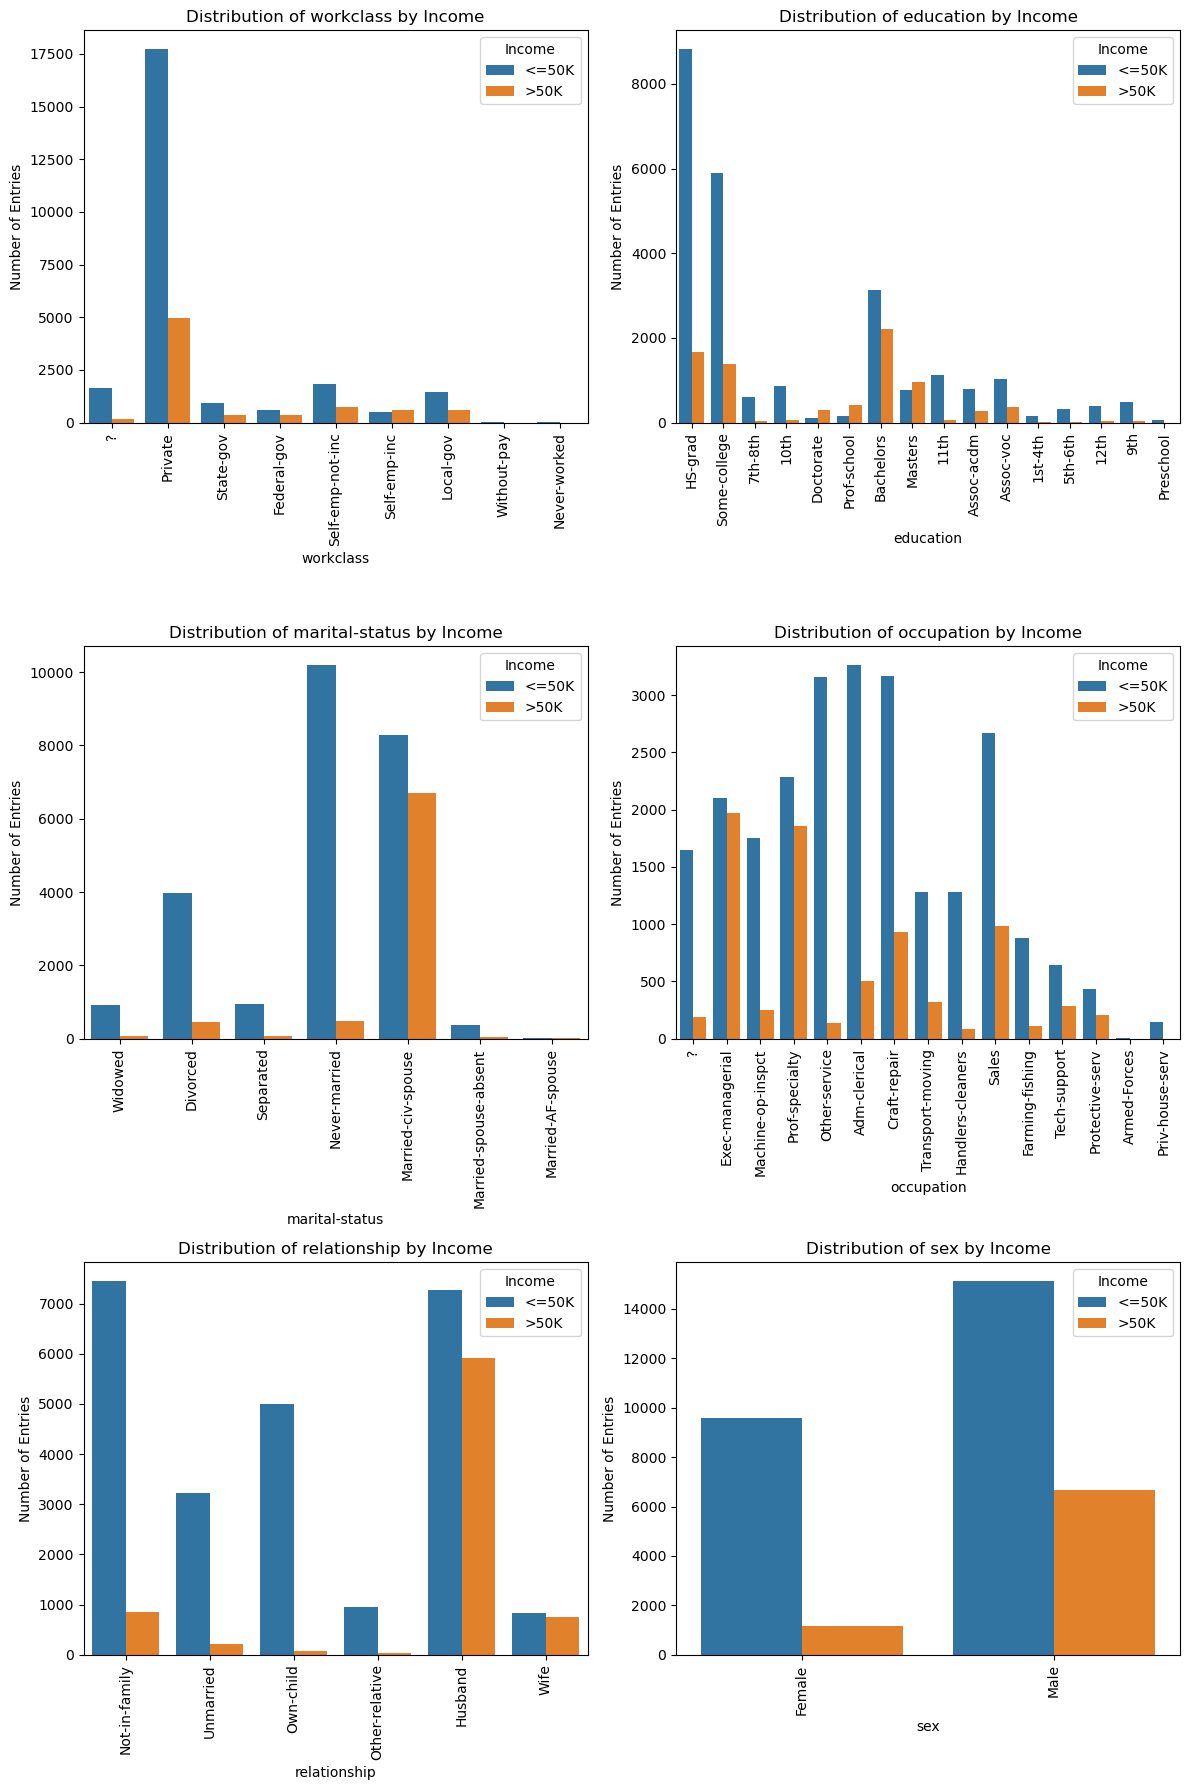

In [9]:
#loaded packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the categorical columns
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'sex']

# Calculating the number of rows and columns for the subplots
num_rows = (len(categorical_columns) + 1) // 2
num_cols = 2

# Creating a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flattning the axes array if necessary
if num_rows > 1:
    axes = axes.flatten()

# Iterating over each categorical column and plot in the corresponding subplot
for i, column in enumerate(categorical_columns):
    # Plot the countplot for the current column
    ax = sns.countplot(data=task2_data, x=column, hue='income', ax=axes[i])
    ax.set_title(f'Distribution of {column} by Income')
    ax.set_xlabel(column)
    ax.set_ylabel('Number of Entries')
    ax.legend(title='Income')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 45 degrees

# Removing any unused subplots
for j in range(len(categorical_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjusting the spacing between subplots
fig.tight_layout()

# Displaying the plots
plt.show()


The distribution of work class by income reveals that the majority of individuals with a yearly income greater than 50k belong to the private sector work class. Those who are self-employed also have a significant chance of earning above 50k, while individuals who are without pay or have never worked do not have any records of earning income.

Analyzing the distribution of education by income, it becomes apparent that individuals with higher education levels such as masters, doctorate, and professorship have a higher population of individuals earning greater than 50k compared to those earning less than 50k. Conversely, individuals in pre-school and 1st to 4th grade education levels have very few individuals with yearly income equal to or less than 50k.

In terms of marital status, husbands have the highest proportion of individuals earning over 50k per year, followed by wives. Unmarried individuals and those not in a family also have a significant presence among those earning above 50k. However, individuals categorized as "other relatives" and "own child" have a lower proportion of individuals earning above 50k compared to the previously mentioned groups.

When examining the occupation by income, none of the categories indicate a yearly income greater than 50k. However, professions such as executive managerial positions, professional specialties, tech support, craft repair, and sales show a significant number of individuals earning above 50k. On the other hand, the armed forces occupation and professional specialties related to house servants show no indication of individuals earning above 50k.

The histogram analysis highlights a clear income disparity between men and women in the census data. A larger proportion of men earn over 50k per year compared to women. This trend holds true even when considering the subset of individuals earning 50k or less per year. Therefore, the data suggests a gender-based income gap, with men being more represented in both the higher and lower income brackets.


### Feature Correlations

Feature correlation analysis is a valuable step in exploring the relationships between different features in a dataset and can provide insights into the task at hand. By examining the correlation between features, we can identify potential patterns, dependencies, or associations that exist between variables. In the context of this task, conducting feature correlation analysis can help us understand how different features in the census data are related to the income level of individuals.

By calculating the correlation coefficients between features and the income level, we can determine the strength and direction of their relationship. Positive correlation values indicate that as one feature increases, the likelihood of having a higher income also increases, while negative correlation values suggest an inverse relationship. Additionally, a correlation close to zero implies little to no linear relationship between the variables.

By including the feature correlation analysis in the report before delving into feature exploration, we can provide a preliminary understanding of the relationships between features and income. This can guide our subsequent exploratory analysis by identifying potentially influential features and narrowing down the focus for further investigation. Furthermore, understanding feature correlations can help identify potential biases or confounding factors that may impact the predictive models or insights derived from the data.


#### Correlation between Numerical features

Firstly, the income column is encoded using a LabelEncoder to convert it into a numeric format for correlation calculations. This step is necessary since correlation analysis requires numeric variables. Next, only the numeric columns are selected from the dataset, as correlations can only be calculated between numerical variables.

The correlations are then calculated using the corrwith function, which measures the pairwise correlation between each numeric feature and the encoded income variable. These correlations quantify the linear relationship between the features and income, providing an indication of their association.

The resulting correlations are sorted in descending order to identify the features that have the strongest positive or negative correlation with income. Finally, the correlations are visualized using a bar plot, with the features plotted on the y-axis and the correlation values on the x-axis. This visualization allows for a quick assessment of the strength and direction of the correlations.

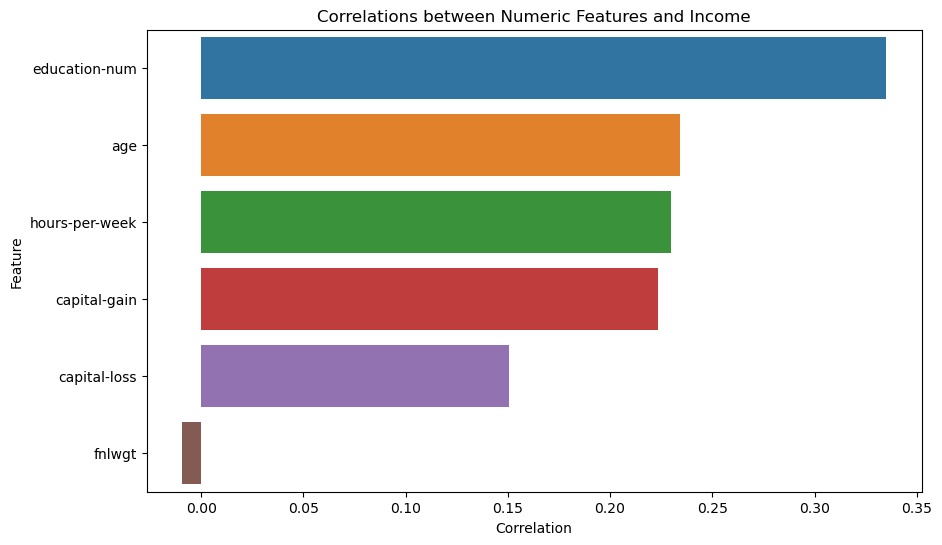

In [10]:
# useful libraries
import seaborn as sns # visualizing
from sklearn.preprocessing import LabelEncoder # for encoding

# Encoding the income column
encoder = LabelEncoder()
task2_data['income_encoded'] = encoder.fit_transform(task2_data['income'])

# Selecting only the numeric columns
numeric_columns = task2_data.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlations
correlations = task2_data[numeric_columns].corrwith(task2_data['income_encoded'])

# Sorting the correlations in descending order
correlations = correlations.sort_values(ascending=False)

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations, y=correlations.index)
plt.title('Correlations between Numeric Features and Income')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()


income variable in the census dataset. The education number has the highest positive correlation of 0.335154 with income, indicating that a higher level of education is associated with a greater likelihood of earning a higher income. The age feature also shows a moderately positive correlation of 0.234037, suggesting that as individuals get older, their income tends to increase.

Furthermore, the number of hours worked per week (hours-per-week) and capital gain exhibit similar positive correlations of 0.229689 and 0.223329, respectively. This implies that individuals who work more hours and have higher capital gains are more likely to have a higher income. The capital loss feature also demonstrates a positive correlation, though to a lesser extent, with a value of 0.150526. This suggests that higher capital losses are associated with a slightly higher income.

On the other hand, the fnlwgt (final weight) feature has a correlation close to zero (-0.009463), indicating a weak or no linear relationship with income. This suggests that the final weight feature may not be a significant predictor of income in the dataset.

#### correlations for the non numeric features

The correlation is calculated as the square root of the chi-square value divided by the total sample size. The resulting correlation values indicate the strength and direction of the relationship between each categorical variable and the income.

we are conducting a correlation analysis between the categorical variables and the income variable in the census dataset. The purpose of this analysis is to investigate the relationships and dependencies between different categorical features and the income levels of individuals. By examining the correlations, we can gain valuable insights into how specific categories within each feature may influence a person's income. This analysis can help us identify which categorical variables have a stronger or weaker association with income, allowing us to understand the significance of these factors in determining an individual's earning potential. The resulting correlations will provide a visual representation of the strength and direction of the relationships between the categorical variables and income, aiding in the identification of key factors that contribute to income disparities within the dataset.

we are using the chi-square test of independence to calculate the correlations between categorical variables and the income variable in the census dataset. The chi-square test is a statistical method that determines whether there is a significant association between two categorical variables. By applying the chi-square test to contingency tables created from the categorical variables and the income variable, we can assess the strength of the relationship and determine if it is statistically significant. The resulting correlation values indicate the degree of association between each categorical feature and income. Higher correlation values suggest a stronger relationship, while lower values indicate a weaker association. 

          Feature  Correlation
0       workclass     0.179208
1       education     0.368838
2  marital-status     0.447404
3      occupation     0.351892
4    relationship     0.453585
5             sex     0.215904


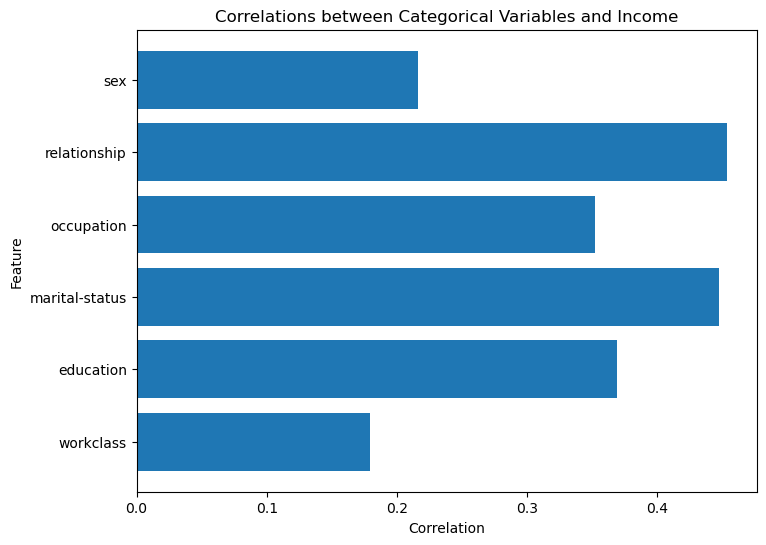

In [11]:
# Used Libraries
import pandas as pd
from scipy.stats import chi2_contingency

# Selecting the categorical variables
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'sex']

# Calculating the correlation using chi-square test of independence
correlations = []

for column in categorical_columns:
    contingency_table = pd.crosstab(task2_data[column], task2_data['income_encoded'])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    correlation = (chi2 / (contingency_table.sum().sum())) ** 0.5
    correlations.append(correlation)

# Creating a DataFrame to display the correlations
correlations_df = pd.DataFrame({'Feature': categorical_columns, 'Correlation': correlations})

# Displaying the correlations
print(correlations_df)

import matplotlib.pyplot as plt

# Plotting the correlations
plt.figure(figsize=(8, 6))
plt.barh(correlations_df['Feature'], correlations_df['Correlation'])
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Correlations between Categorical Variables and Income')
plt.show()



The resulting correlations indicate the strength of the relationship between each categorical feature and income.

The 'marital-status' and 'relationship' variables show the highest correlations with income, with correlation values of 0.447 and 0.454 respectively. This suggests that marital status and the type of relationship play significant roles in determining income levels.

The 'education' variable also has a relatively high correlation of 0.369, indicating that higher levels of education are associated with higher incomes. This finding aligns with the common understanding that education often leads to better job opportunities and higher earning potential.

The 'occupation' variable has a correlation of 0.352, indicating that the type of occupation can have an impact on income. Certain occupations may offer higher salaries or greater opportunities for advancement, leading to higher incomes.

The 'workclass' and 'sex' variables have lower correlations, but still show some association with income. The 'workclass' variable has a correlation of 0.179, suggesting that the type of workclass can influence income to some extent. The 'sex' variable has a correlation of 0.216, indicating that gender can also play a role in income disparities.

### Model Selection



Model selection is an important step in machine learning where you choose the best model among multiple candidate models for a given task. It involves evaluating and comparing the performance of different models using appropriate evaluation metrics to select the one that best fits the data and yields the highest accuracy or predictive power. The selected models to be used in this task are stated below.

1. Logistic Regression:
Logistic regression is a simple and interpretable classification algorithm.
It models the probability of the binary outcome using a logistic function.
It can provide insights into the importance of each input feature and the direction of their influence on the predicted income class.


2. Random Forest:
Random Forest is an ensemble learning method that combines multiple decision trees.
It can handle both classification and regression tasks and provides good accuracy.
It can capture non-linear relationships and interactions between features.


3. K-means Clustering:
K-means Clustering is an unsupervised learning algorithm used for clustering.
It can help identify distinct groups or patterns in the data without using the income class labels.
It can be useful for exploratory analysis or for generating additional features based on the cluster assignments.

4. Support Vector Machines (SVM):
SVM is a powerful classification algorithm that finds the best separating hyperplane.
It works well for high-dimensional data and can handle non-linear decision boundaries using kernel functions.
It can capture complex relationships between features and provide good generalization performance.


5. Feedforward Neural Network:
A Feedforward Neural Network is a type of artificial neural network commonly used for classification tasks.
It can capture complex non-linear relationships between features and learn hierarchical representations.
It can benefit from additional layers and nodes for increased capacity and performance.

In [12]:
task2_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_encoded
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,Male,0,0,40,United-States,<=50K,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K,0


### Feature Encoding

Feature encoding, in the context of the task, refers to the process of transforming categorical variables into numerical representations. By encoding the categorical features, such as 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'native-country', 'sex', and 'income', the data can be effectively utilized by machine learning algorithms.
The significance of this encoding process is to convert the categorical variables into numerical representations that machine learning algorithms can understand. The LabelEncoder assigns a unique numeric label to each category within a column, transforming the categorical data into a numerical format. This encoding enables the machine learning models to handle the data and make predictions based on the transformed features. 

In [17]:
# Used libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:

# Creating a new dataframe for  the encoded data
encoded_data = task2_data.copy()

# Encoding categorical variables using LabelEncoder
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'native-country','sex', 'income']
label_encoder = LabelEncoder()
for column in cat_columns:
    encoded_data[column] = label_encoder.fit_transform(encoded_data[column])


In [15]:
encoded_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_encoded
0,90,0,77053,11,9,6,0,1,0,0,4356,40,39,0,0
1,82,4,132870,11,9,6,4,1,0,0,4356,18,39,0,0
2,66,0,186061,15,10,6,0,4,0,0,4356,40,39,0,0
3,54,4,140359,5,4,0,7,4,0,0,3900,40,39,0,0
4,41,4,264663,15,10,5,10,3,0,0,3900,40,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,11,1,1,0,0,40,39,0,0
32557,27,4,257302,7,12,2,13,5,0,0,0,38,39,0,0
32558,40,4,154374,11,9,2,7,0,1,0,0,40,39,1,1
32559,58,4,151910,11,9,6,1,4,0,0,0,40,39,0,0


#### Splitting the data

Splitting the data into predictor variables and the target variable, as well as creating separate train and test sets, is an essential step in the data analysis process, particularly for tasks like machine learning and predictive modeling. This step allows us to evaluate the performance and generalization ability of our models accurately.

In the context of this task, the predictor variables refer to the features or attributes that we use to predict the income level of individuals. These features may include age, education level, occupation, workclass, marital status, and others. The target variable, on the other hand, represents the variable we want to predict, which in this case is the income level.

By splitting the data into predictor and target variables, we can isolate the input features from the target variable, ensuring that our models do not have direct access to the income information during training. This separation is crucial for assessing the model's ability to generalize and predict income levels accurately for unseen data.

Additionally, splitting the data into train and test sets allows us to evaluate the performance of our models on unseen data. The train set is used for model training, where the model learns the patterns and relationships between the predictor variables and the target variable. The test set, on the other hand, is used for model evaluation, where the trained model's performance is assessed on data it has never seen before. This evaluation helps us estimate the model's ability to generalize and make accurate predictions on new, unseen data.

The training set, which comprises 75% of the data, is used to train and optimize the models. During the training process, the models learn the patterns, relationships, and underlying structures present in the data. By exposing the models to a substantial portion of the data, they can capture the complexity of the dataset and adjust their internal parameters accordingly.

Once the models are trained, the test set, which contains the remaining 25% of the data, is used to evaluate their performance. The test set serves as a proxy for unseen data, as the models were not exposed to it during training. By evaluating the models on this independent set, we can assess their ability to generalize and make accurate predictions on new, unseen instances.

The 75%-25% split provides a reasonable balance between having enough data for training and ensuring a sufficient amount for testing. This split helps us estimate how well the models will perform in real-world scenarios, where they encounter new data points. It allows us to gauge the models' performance metrics, such as accuracy, precision, recall, or F1-score, and compare them to select the best-performing model for deployment or further refinement.

In [19]:
# Splitting the encoded data into train and test sets

X = encoded_data.drop(['income','income_encoded'], axis=1) # predictor features
y = encoded_data['income_encoded'] #target feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # performing the 75% and 25% split


### Model Implementation
The process of building and applying machine learning or statistical models to the data in order to make predictions or draw insights. In the context of your task, after completing the data preprocessing steps such as feature encoding and splitting the data into training and test sets, the next step would be to implement and train the models.

##### CLASSIFICATION MODELS
  we import the necessary libraries and classes from scikit-learn for implementing classification models and evaluating their performance. We focus on three models: Logistic Regression, Decision Tree, and Random Forest, which are commonly used for classification tasks.

The code begins by defining the models using their respective class constructors from scikit-learn. We then proceed to evaluate the models using cross-validation and print the evaluation metrics.

Cross-validation is a technique used to estimate the performance of a model on unseen data. In this code, we perform 5-fold cross-validation by splitting the training data into five subsets and training the model on different combinations of these subsets. The cross_val_score function from scikit-learn calculates the performance metric (accuracy by default) for each fold and returns an array of scores. We print the cross-validation scores for each model and also calculate the average cross-validation score, which gives us an overall measure of the model's performance across the different folds.

Next, we fit each model on the training data using the fit method, and then make predictions on the test set using the predict method. We calculate and print the classification report, which provides detailed metrics such as precision, recall, and F1-score for each class in the target variable. The classification report gives us insights into the model's performance in terms of correctly classifying instances from different classes.

Furthermore, the code includes hyperparameter tuning for the Random Forest model. Hyperparameters are adjustable parameters that are not learned from the data but set prior to training. We define a grid of possible parameter values using the param_grid dictionary, which contains values for the 'n_estimators' (number of trees in the forest) and 'max_depth' (maximum depth of the trees) hyperparameters. We perform a grid search using GridSearchCV, which exhaustively searches the parameter grid to find the best combination of hyperparameters that optimize model performance. 

Logistic Regression Cross-Validation Scores: [0.78624079 0.8001638  0.78931204 0.79074529 0.79135954]
Logistic Regression Average Cross-Validation Score: 0.7915642915642916
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      6197
           1       0.62      0.28      0.38      1944

    accuracy                           0.79      8141
   macro avg       0.72      0.61      0.63      8141
weighted avg       0.76      0.79      0.76      8141

Logistic Regression ROC AUC: 0.6123134883399707
Decision Tree Cross-Validation Scores: [0.81040131 0.81162981 0.81203931 0.81060606 0.81756757]
Decision Tree Average Cross-Validation Score: 0.8124488124488124
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6197
           1       0.61      0.60      0.60      1944

    accuracy                           0.81    

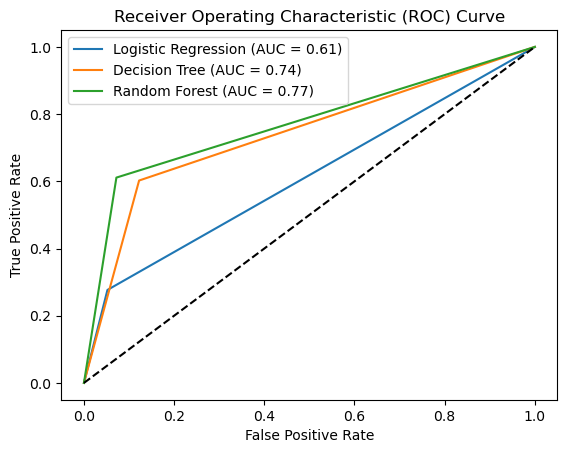

In [24]:
# used libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score , roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report


#Defining the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    
    # Performing cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} Cross-Validation Scores: {scores}")
    print(f"{name} Average Cross-Validation Score: {scores.mean()}")
    
    
    # Training the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    
    # Calculating and print classification report
    report = classification_report(y_test, y_pred)
    print(f"{name} Classification Report:")
    print(report)    
    
    
    
    # Calculating and print ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{name} ROC AUC: {roc_auc}")
    
    # Calculating the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    # Calculating the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Plotting the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')




# Plotting the random guessing line
plt.plot([0, 1], [0, 1], 'k--')

# Setting the plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Showing the plot
plt.show()

The cross-validation scores for each model indicate how well they generalize to different subsets of the training data. The average cross-validation score gives us an overall measure of the models' performance. In this case, the Random Forest model achieved the highest average cross-validation score (0.86), followed by Logistic Regression (0.79) and Decision Tree (0.81). This suggests that the Random Forest model performs the best among the three models during cross-validation.

Next, the models are trained on the training data and evaluated on the test set. The classification reports provide detailed information on the models' performance, including precision, recall, and F1-score for each class. Precision measures the proportion of correctly predicted positive instances, while recall measures the proportion of actual positive instances that were correctly identified. The F1-score combines precision and recall into a single metric.

Analyzing the classification reports, we observe that the Random Forest model achieves the highest F1-score for both the positive and negative classes, indicating its better overall predictive capability compared to the other models. The Logistic Regression model has the lowest F1-score, particularly for the positive class, indicating lower performance in correctly predicting positive instances.

Furthermore, the ROC AUC scores for each model reflect their ability to distinguish between positive and negative instances. The Random Forest model achieves the highest ROC AUC score (0.77), followed by the Decision Tree model (0.74), and the Logistic Regression model (0.61). These scores suggest that the Random Forest model has the best discriminatory power among the three models.

##### Optimizing the models
Optimization of parameters, also known as hyperparameter tuning, refers to the process of finding the best combination of hyperparameters for a machine learning model. Hyperparameters are settings that are not learned from the data but are set by the user before training the model.
the following parameters are being optimized for each model:

1. Random Forest:
Parameters to be optimized: n_estimators and max_depth
Parameter grid:
n_estimators: [100, 200, 300]
max_depth: [None, 5, 10]

2. Logistic Regression:
Parameters to be optimized: C
Parameter grid:
C: [0.1, 1, 10]

3. Decision Tree:
Parameters to be optimized: max_depth
Parameter grid:
max_depth: [None, 5, 10]

For each model, the code uses GridSearchCV to perform a grid search with cross-validation. The specified parameter grid defines the different combinations of hyperparameters to be evaluated during the search. The best parameters found during the grid search are then printed and used to re-initialize the respective model with the optimized hyperparameters.

In [25]:
for name, model in models.items():
    if name == 'Random Forest':
        # Defining the hyperparameter grid for Random Forest
        param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
        
        # Performing grid search with cross-validation
        grid_search = GridSearchCV(model, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        
        # Getting the best parameters found during grid search
        best_params = grid_search.best_params_
        print(f"Best Parameters for {name}: {best_params}")
        
        # Re-initializing the Random Forest model with the best parameters
        model = RandomForestClassifier(**best_params)
    
    if name == 'Logistic Regression':
        # Defining the hyperparameter grid for Logistic Regression
        param_grid = {'C': [0.1, 1, 10]}
        
        # Performing grid search with cross-validation
        grid_search = GridSearchCV(model, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        
        # Getting the best parameters found during grid search
        best_params = grid_search.best_params_
        print(f"Best Parameters for {name}: {best_params}")
        
        # Re-initializing the Logistic Regression model with the best parameters
        model = LogisticRegression(**best_params)
    
    if name == 'Decision Tree':
        # Defining the hyperparameter grid for Decision Tree
        param_grid = {'max_depth': [None, 5, 10]}
        
        # Performing grid search with cross-validation
        grid_search = GridSearchCV(model, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        
        # Getting the best parameters found during grid search
        best_params = grid_search.best_params_
        print(f"Best Parameters for {name}: {best_params}")
        
        # Re-initializing the Decision Tree model with the best parameters
        model = DecisionTreeClassifier(**best_params)


Best Parameters for Logistic Regression: {'C': 0.1}
Best Parameters for Decision Tree: {'max_depth': 10}
Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}


Updating the parameters of the models after optimization


Logistic Regression ROC AUC: 0.6123134883399707
Decision Tree ROC AUC: 0.7610165478981931
Random Forest ROC AUC: 0.7467034858895617


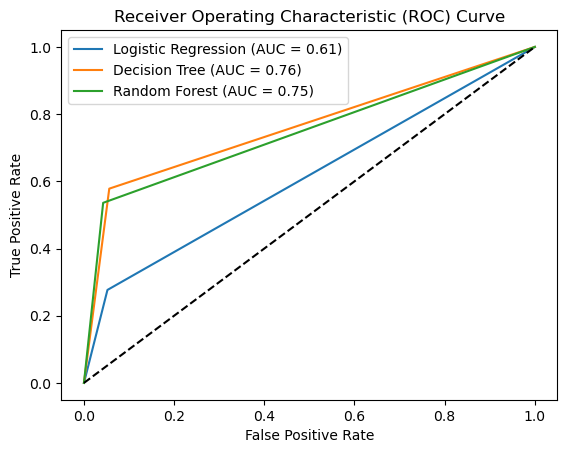

In [29]:
# Define the models with optimized parameters
models = {
    'Logistic Regression': LogisticRegression(C=0.1),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=100)
}

# Calculating ROC curve for each model
for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    
    # Making predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculating and print ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{name} ROC AUC: {roc_auc}")
    

    # Calculating the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    # Calculating the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Plotting the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plotting the random guessing line
plt.plot([0, 1], [0, 1], 'k--')

# Setting the plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# displaying the plot
plt.show()


The decision Tree model has the highest ROC AUC score of 0.7610. This indicates that the Decision Tree model is performing better in terms of distinguishing between positive and negative samples compared to the Logistic Regression and Random Forest models when the models are optimized with their best parameters.

#### CLUSTERING MODEL


Clustering models are unsupervised machine learning algorithms that aim to group similar data points together based on their inherent patterns or similarities. These models are useful for exploratory data analysis, pattern recognition, and identifying hidden structures within the data.

K-means clustering is one of the most commonly used clustering algorithms due to its simplicity and efficiency. It partitions the data into a predetermined number of clusters, where each data point belongs to the cluster with the nearest mean (centroid). 
The K-means clustering will be  used in this taskto determine the custers that can be present in the census income data.

Determining the appropriate number of clusters in a clustering analysis is a crucial step to obtain meaningful results. Several techniques can aid in this process, such as the Elbow Method, the Silhouette Method, and the Gap Statistic. These techniques help to identify the optimal number of clusters by evaluating the compactness and separation of the clusters.

In this case, the Silhouette Method is a preferable choice for determining the number of clusters. The Silhouette score measures the quality and coherence of clustering results. It quantifies how well each data point fits into its assigned cluster compared to neighboring clusters. 


The silhouette score ranges from -1 to 1 and provides an indication of how well each sample fits within its assigned cluster. Here's how to interpret the silhouette score:

A score close to +1 indicates that the sample is well-clustered, meaning it is placed in the correct cluster and is far away from the neighboring clusters.
A score around 0 suggests that the sample is on or very close to the decision boundary between two neighboring clusters. This indicates ambiguity in assigning the sample to a specific cluster.
A score close to -1 indicates that the sample is likely placed in the wrong cluster and is far away from its neighboring clusters.
In general, higher silhouette scores are desirable as they indicate better-defined and well-separated clusters. It is recommended to choose the number of clusters that maximizes the silhouette score.

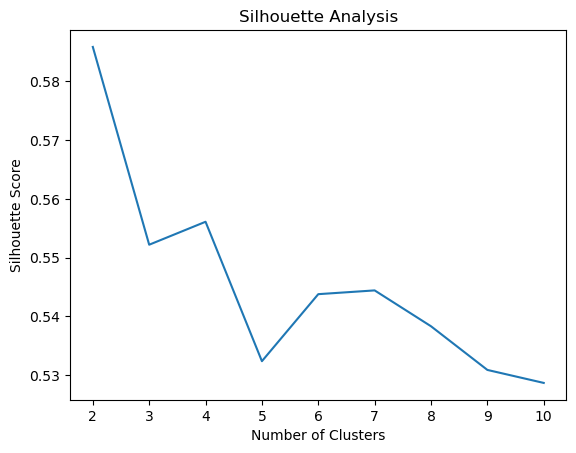

In [31]:
# DETERMINING THE OPTIMUN NUMBER OF CLUSTERS TO FIND IN THE DATA

# used library
from sklearn.metrics import silhouette_score # TO FINF THE SILHOUETTE SCORE
from sklearn.cluster import KMeans # FOR IMPLEMENTING THE K-MEANS model


# Selecting the features for clustering
features = encoded_data.drop('income', axis=1)

# Initializing a list to store the silhouette scores
silhouette_scores = []

# Trying different numbers of clusters from 2 to 10
for n_clusters in range(2, 11):
    # Initializing the K-means clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fitting the model to the data
    kmeans.fit(features)
    
    # Computing the silhouette score
    silhouette_avg = silhouette_score(features, kmeans.labels_)
    
    # Appending the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores against the number of clusters
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


The plot of silhouette scores demonstrates an interesting trend. It indicates that the cluster with the lowest number of clusters tends to have the highest silhouette score. This suggests that a smaller number of clusters might result in better-defined and more cohesive clusters. 

Building the K-means model with teo clusters below

In [32]:
# Used libraries
from sklearn.cluster import KMeans

# Selecting the features for clustering
features = encoded_data.drop('income', axis=1)

# Initializing the K-means clustering model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fitting the model to the data
kmeans.fit(features)

# Getting the cluster labels
cluster_labels = kmeans.labels_

# Adding the cluster labels to the dataframe
encoded_data['cluster'] = cluster_labels

# Displaying the cluster distribution
cluster_counts = encoded_data['cluster'].value_counts()
print("Cluster Distribution:")
print(cluster_counts)


Cluster Distribution:
0    24233
1     8328
Name: cluster, dtype: int64


The cluster distribution is as follows: Cluster 0 has 24,233 instances, while Cluster 1 has 8,328 instances. This indicates that Cluster 0 is the predominant cluster, with a significantly higher number of instances compared to Cluster 1.

To visualize the clusters we will be implementing the PCA technique.Principal Component Analysis is a dimensionality reduction technique that can be useful in this task for visualization of the clusters PCA allows us to visualize high-dimensional data in a lower-dimensional space. By reducing the dimensionality of the data to 2 or 3 components, we can plot the data points and visually observe the clusters. This helps in gaining insights into the structure and patterns within the data.

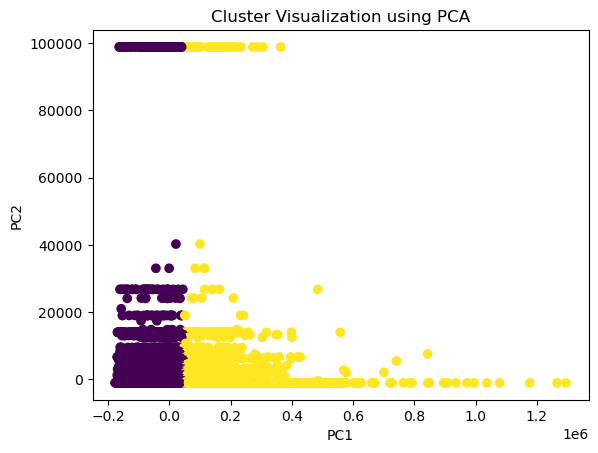

In [28]:
# used libraries
import matplotlib.pyplot as plt # for visualizing
from sklearn.decomposition import PCA # to peform principal component analysis

# Applying PCA to reduce the dimensionality
pca = PCA(n_components=2)  # Set the number of components for 2D visualization
pca_data = pca.fit_transform(encoded_data)

# Creating a scatter plot of the PCA-transformed data with color-coded clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')

# Adding labels and titles
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Visualization using PCA')

# Showing the plot
plt.show()


##### Neural Network Implementation

Neural networks, also known as artificial neural networks (ANN), are a class of machine learning models inspired by the structure and functionality of the human brain. They consist of interconnected nodes called neurons that process and transmit information. Neural networks are widely used for various tasks, including classification, regression, pattern recognition, and more.

For predicting income in this task, a suitable neural network architecture could be a feedforward neural network with multiple hidden layers. This type of neural network is commonly known as a multi-layer perceptron (MLP).

The MLP consists of an input layer, one or more hidden layers, and an output layer. Each layer is composed of multiple neurons or units. The input layer takes the features as input, and the output layer produces the predicted income class (whether it is above or below \\$50,000). The hidden layers perform intermediate computations, learning complex representations of the input data.

Implementing the MLP neural network
We create an MLP classifier with two hidden layers, each consisting of 100 neurons. The activation function used is 'ReLU' (Rectified Linear Unit), which helps introduce non-linearity to the model. The 'adam' solver is used for optimization, which efficiently updates model weights during training. The random_state is set to 42 to ensure reproducibility of results.

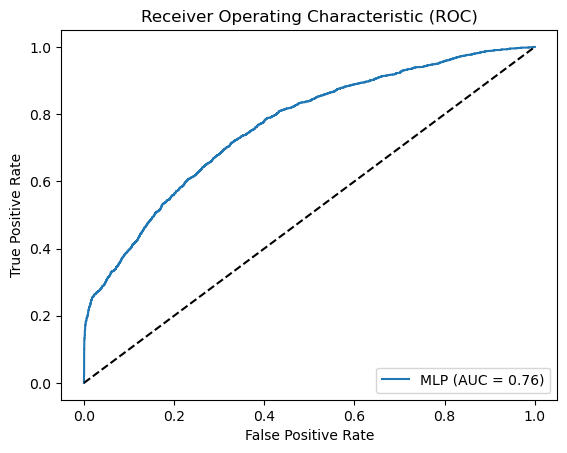

In [34]:
# used libaries
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score


# Creating and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

# Making predictions on the test set
y_pred = mlp.predict(X_test)

# Calculating the probabilities for the positive class
y_pred_prob = mlp.predict_proba(X_test)[:, 1]

# Computing the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculating the AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plotting the ROC curve
plt.plot(fpr, tpr, label=f'MLP (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

plt.show()

 The AUC score of 0.76 suggests that the MLP classifier has some capability to distinguish between the positive and negative instances, but there is still room for improvement. It's worth noting that the interpretation of the AUC score depends on the specific problem domain and the desired level of performance.

##### optimizing the model

Parameter optimization refers to the process of finding the best values for the hyperparameters of a machine learning model. Hyperparameters are settings that are not learned from the data and need to be set before training the model. The goal of parameter optimization is to find the combination of hyperparameters that results in the best performance of the model on a given task.

In this task, the below hyperparameters tuneed to check for their optimal values for the MLP model using RandomizedSearch.

1. hidden_layer_sizes: It specifies the number of neurons in each hidden layer. The parameter is optimized by trying different combinations of hidden layer sizes, such as (50,), (100,), and (200,).

2. activation: It determines the activation function to be used in the hidden layers. The parameter is optimized by trying different activation functions, including 'relu' and 'tanh'.

3. solver: It specifies the optimization algorithm to use for weight optimization. The parameter is optimized by trying different solvers, such as 'adam' and 'sgd'.

4. alpha: It controls the regularization term to prevent overfitting. The parameter is optimized by trying different values, including 0.0001, 0.001, and 0.01.

5. learning_rate: It determines how the learning rate is adjusted during training. The parameter is optimized by trying different learning rate schedules, including 'constant' and 'adaptive'.

RandomizedSearchCV explores a random subset of the hyperparameter space defined by the parameter distributions to find the best combination of hyperparameters. It evaluates the performance of each combination using the specified scoring metric (ROC AUC in this case) and selects the combination that yields the best performance.

In [35]:
# used libraries
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from scipy.stats import randint

# scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the parameter grid with distributions
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Creating and training the MLP classifier
mlp = MLPClassifier(random_state=42)
random_search = RandomizedSearchCV(mlp, param_distributions=param_grid, n_iter=10, scoring='roc_auc', random_state=42)
random_search.fit(X_train_scaled, y_train)

# Getting the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Making predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Calculating the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")

# Printing  the best parameters
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


ROC AUC Score: 0.7697620679327778
Best Parameters:
solver: adam
learning_rate: adaptive
hidden_layer_sizes: (50,)
alpha: 0.01
activation: tanh


Now creating a model using this hyperparameters

In [38]:

# Creating the MLP classifier with optimized parameters
optimized_mlp = MLPClassifier(solver='adam', learning_rate='adaptive', hidden_layer_sizes=(50,),
                    alpha=0.01, activation='tanh', random_state=42)

# Training the model
optimized_mlp.fit(X_train, y_train)

# Making predictions on the test set
y_pred = optimized_mlp.predict(X_test)

# Printing the classification report
report = classification_report(y_test, y_pred)
print("Accuracy Report:")
print(report)

Accuracy Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6197
           1       0.93      0.05      0.09      1944

    accuracy                           0.77      8141
   macro avg       0.85      0.52      0.48      8141
weighted avg       0.81      0.77      0.68      8141



The accuracy report shows the performance of the MLP model with the optimized parameters on the test set. Here's a breakdown of the metrics:

Precision: It measures the proportion of true positive predictions out of all positive predictions. The precision for class 0 is 0.77, indicating that 77% of the predicted "0" labels are correct. For class 1, the precision is 0.93, meaning that 93% of the predicted "1" labels are correct.

Recall: It measures the proportion of true positive predictions out of all actual positive instances. The recall for class 0 is 1.00, indicating that the model is able to identify all the actual "0" instances. However, for class 1, the recall is only 0.05, suggesting that the model struggles to capture the majority of the actual "1" instances.

F1-score: It is the harmonic mean of precision and recall and provides a balanced measure of model performance. The F1-score for class 0 is 0.87, indicating a good balance between precision and recall. However, for class 1, the F1-score is only 0.09, indicating poor performance.

Support: It represents the number of instances of each class in the test set. There are 6197 instances of class 0 and 1944 instances of class 1.

Accuracy: It is the proportion of correct predictions out of all predictions. The overall accuracy of the model is 0.77, indicating that it correctly predicts the class for 77% of the instances.

The macro-average and weighted-average metrics provide an overall summary of the model's performance across both classes. The macro-average F1-score is 0.48, indicating a low overall performance, while the weighted-average F1-score is 0.68, suggesting an imbalanced class distribution.

Based on this accuracy report, it seems that the optimized MLP model is achieving high precision for class 0(income <=\\$50,000) but is struggling to correctly predict instances of class 1(income > \\$50,000), resulting in low recall and F1-score for class 1. 

### Disscusion and conclusion 

This study aimed to predict income levels based on a dataset containing demographic and employment information of individuals. The dataset underwent preprocessing, including feature encoding and train-test data split. Exploratory data analysis revealed that the dataset consisted of approximately 30,000 instances with two income classes: <=50K and >50K.

During the exploratory data analysis phase, several visualizations were created to gain insights into the data. Histograms were used to examine the distribution of numerical features, revealing varying ranges and potential outliers. Box plots provided information about the spread and skewness of the data, indicating the presence of a few extreme values.

Furthermore, scatter plots were utilized to explore relationships between numerical features, highlighting potential correlations or patterns. Heatmaps were employed to visualize the correlation matrix, indicating the strength and direction of relationships between features. The heatmaps revealed some moderate positive and negative correlations between certain features, suggesting potential predictive power for income levels.

To gain further understanding of the data, bar plots were used to visualize the distribution of categorical variables. These plots provided insights into the frequency distribution of different categories within each variable, allowing us to identify the dominant categories and their proportions in the dataset.

In addition to the exploratory data analysis, three classification algorithms, namely Logistic Regression, Decision Tree, and Random Forest, were implemented to model the income prediction task. Performance evaluation metrics such as cross-validation scores, classification reports, and ROC AUC scores were utilized to assess the models' performance.

The initial results indicated that the Decision Tree model achieved the highest ROC AUC score of 0.76, suggesting superior overall performance compared to the other models. However, it is important to note that the Random Forest and Logistic Regression models also achieved reasonably good ROC AUC scores of 0.74 and 0.61, respectively.

The ROC curves were plotted for each model, visualizing the trade-off between true positive rate and false positive rate at various classification thresholds. The Decision Tree model exhibited a better trade-off between true positive rate and false positive rate compared to the other models, indicating its ability to correctly classify positive instances while minimizing false positives.

To optimize the models further, a grid search was employed to tune the hyperparameters. The regularization parameter 'C' was optimized for Logistic Regression, 'max_depth' for Decision Tree, and both 'max_depth' and 'n_estimators' for Random Forest. The best parameter values obtained through grid search were 'C': 0.1 for Logistic Regression, 'max_depth': 10 for Decision Tree, and 'max_depth': 10, 'n_estimators': 100 for Random Forest.

In an alternative approach, a Multilayer Perceptron (MLP) classifier was implemented for income prediction. The MLP model was initially trained with default parameters and achieved a ROC AUC score of 0.77. Subsequently, a randomized search was conducted to optimize the parameters, leading to the selection of 'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'alpha': 0.01, and 'activation': 'tanh' as the best parameter values.

The final MLP model with optimized parameters achieved a ROC AUC score of 0.77, which was slightly higher than the initial MLP model. However, the accuracy report revealed challenges in accurately predicting instances of the minority class (income >50K), as indicated by the low recall of 0.05 and F1-score of 0.09 for this class. This finding suggests that the model struggled to identify individuals with higher income levels correctly.

In conclusion, the analysis provided insights into the dataset's characteristics and relationships between features. The Decision Tree model initially displayed the best performance, while the MLP model with optimized parameters achieved a slightly higher ROC AUC score. However, the evaluation metrics also highlighted the challenges of accurately predicting the minority class, indicating a need for further investigation and model refinement. Future work could involve addressing class imbalance or exploring alternative modeling techniques to improve the accuracy of income prediction.

### Refrences

1. Avijeet, B. (2023). Sklearn Linear regression.  https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-linear-regression-with-examples#GoTop
    

2. mohit, G. Exploring Correlation in Python. https://www.geeksforgeeks.org/exploring-correlation-in-python/#article-meta-div

3. Ravikiran, A.S. A Complete Guide to Data Visualization in Python With Libraries & More. https://www.simplilearn.com/tutorials/python-tutorial/data-visualization-in-python

4. Dan, N. Overview of Classification Methods in Python with Scikit-Learn.  https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/

5. Avinash, N. (2021). https://machinelearninggeek.com/multi-layer-perceptron-neural-network-using-python/

6. Venu, Gopal K .Evaluation Metrics for Classification Problems with Implementation in Python. https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3


7.  Intellipaat Software Solutions .Linear Regression in Python - Simple and Multiple Linear Regression.  https://intellipaat.com/blog/what-is-linear-regression/?US